Two clusters - around the City and University of Washington. 

Most popular stations are with fat circles.

*The code tested on Python 2.7*

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

plt.style.use('ggplot')
fig = plt.figure(figsize=(8,8))
stations = pd.read_csv('../input/station.csv', index_col='station_id') 
trips = pd.read_csv('../input/trip.csv', skiprows=50793 )


(array([ 45.,  13.]), array([ 0. ,  0.5,  1. ]), <a list of 2 Patch objects>)

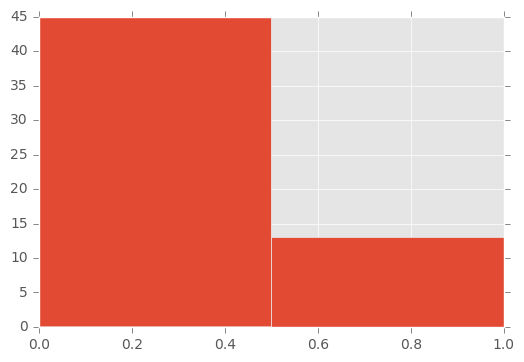

In [2]:
bound = .001
to_station_id_counts = pd.DataFrame(trips['to_station_id'].value_counts())
from_station_id_counts = pd.DataFrame(trips['from_station_id'].value_counts())

stations = stations.join(to_station_id_counts).join(from_station_id_counts)
stations['traffic'] = stations.to_station_id + stations.from_station_id


right = stations.loc[:,['station_id','long','lat']]
df = trips.merge(right, left_on='to_station_id', right_on='station_id', how='outer')


statCoord = stations[['long','lat']]
clusters = KMeans(n_clusters=2, random_state=222).fit_predict(statCoord)
stations['clusters']=clusters

plt.hist(clusters, bins=2)

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=-122.35623,47.597488000000006,-122.283119,47.667145&bboxSR=4269&imageSR=4269&size=1000,952&dpi=96&format=png32&f=image


URLError: <urlopen error [Errno -2] Name or service not known>

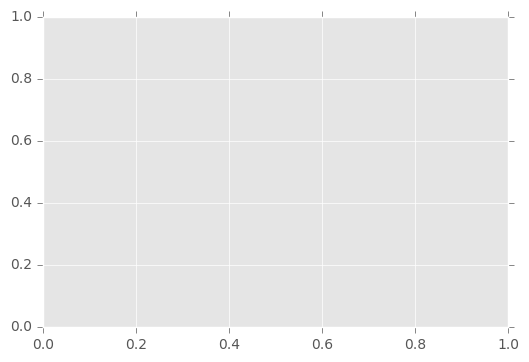

In [3]:
map = Basemap(projection='tmerc', 
            llcrnrlat=df['lat'].min()-bound, 
            urcrnrlat=df['lat'].max()+bound, 
            llcrnrlon=df['long'].min()-bound, 
            urcrnrlon=df['long'].max()+bound, 
            resolution='c', epsg=4269)
map.arcgisimage(service="NatGeo_World_Map", xpixels=1000, verbose=True) 

plt.title('Seattles Cycle Share System') 
map.scatter(stations.long, stations.lat, s=stations.traffic**(1/2.0), marker='o', c=clusters)
plt.show()